In [71]:
## Sahil Shivaji Patil
## 21510060
## T-3

## SVM Classification and MLP Classfication

In [1]:
##importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## import dataset
df = pd.read_csv('water_potability.csv')

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
df.shape

(3276, 10)

In [10]:
df.isna().sum() # check null values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
df.isna().sum()*100/df.shape[0]

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [14]:
## dataset has null values
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [15]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
# no duplicated values
df.duplicated().sum()


0

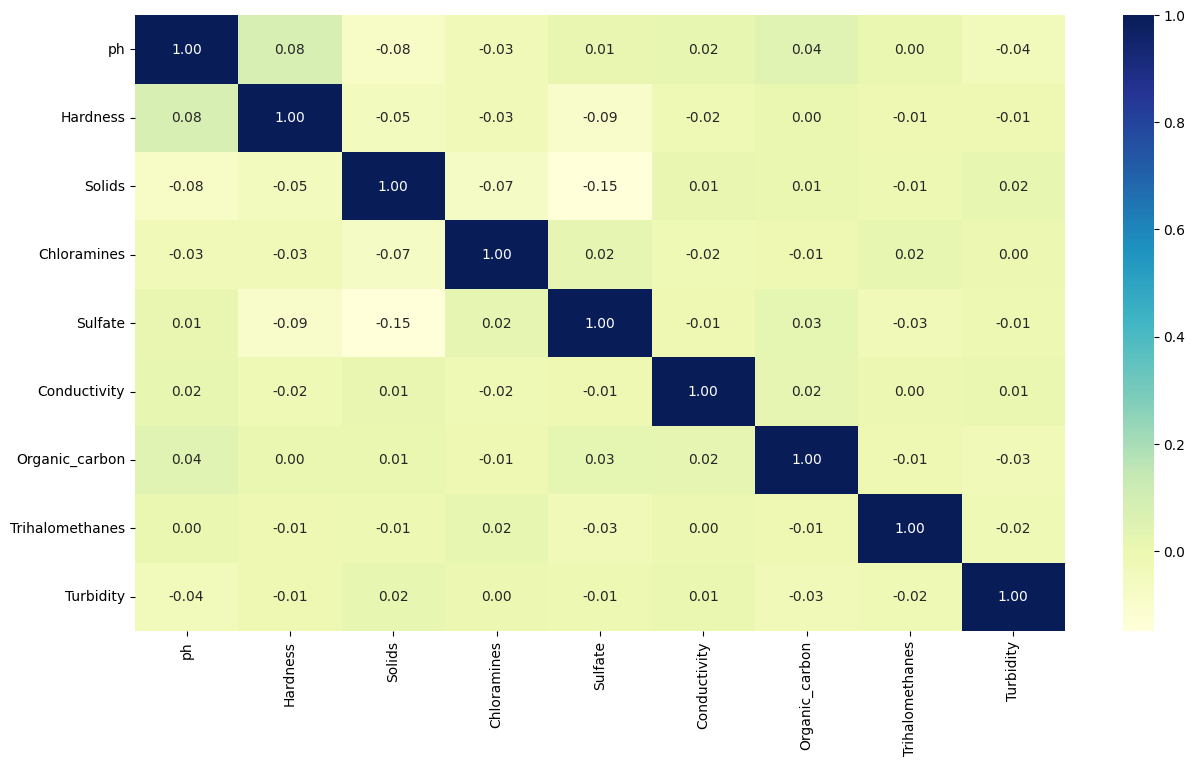

In [20]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))
sns.heatmap(df.iloc[:,0:9].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu');

In [21]:
#separate input and output data
x=df.drop('Potability',axis=1);
y=df['Potability']

In [22]:
# splitting the datatset into training and testing data
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train.shape , x_test.shape

((2620, 9), (656, 9))

In [25]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

## SVM Classification

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC(random_state=42)

In [29]:
svc.fit(x_train_sc,y_train)

SVC(random_state=42)

In [32]:
y_pred_svc = svc.predict(x_test_sc)

## MLP Classification

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x_train_sc, y_train)

D:\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [35]:
y_pred_mlp = mlp.predict(x_test_sc)

In [36]:
## Evaluating the models based on accuracy, precision and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [37]:
svc_eval = [accuracy_score(y_test,y_pred_svc),precision_score(y_test, y_pred_svc),recall_score(y_test, y_pred_svc),f1_score(y_test, y_pred_svc)]
mlp_eval = [accuracy_score(y_test,y_pred_mlp),precision_score(y_test, y_pred_mlp),recall_score(y_test, y_pred_mlp),f1_score(y_test, y_pred_mlp)]

In [40]:
print("SVC Classifier"), svc_eval

SVC Classifier


(None,
 [0.6859756097560976,
  0.7021276595744681,
  0.27049180327868855,
  0.3905325443786982])

In [41]:
print("MLP Classifier"), mlp_eval

MLP Classifier


(None,
 [0.6478658536585366,
  0.5414012738853503,
  0.3483606557377049,
  0.4239401496259352])

In [73]:
eval = pd.DataFrame(data=[svc_eval,mlp_eval],columns=['Accuracy','Precision','Recall','F1-Score'],index=['SVC','MLP'])
eval

,Accuracy,Precision,Recall,F1-Score
SVC,0.685976,0.702128,0.270492,0.390533
MLP,0.647866,0.541401,0.348361,0.423940


In [42]:
svc_cm=confusion_matrix(y_test,y_pred_svc)
mlp_cm=confusion_matrix(y_test,y_pred_mlp)

Text(0.5, 1.0, 'MLP Classification')

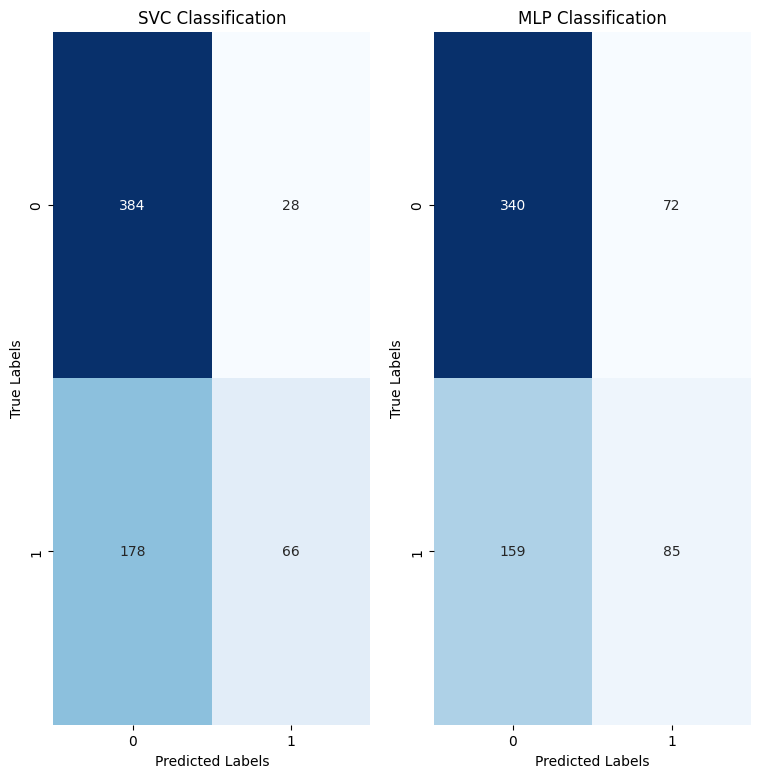

In [45]:
plt.figure(figsize=[9,9])
plt.subplot(1,2,1)
sns.heatmap(svc_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVC Classification')

plt.subplot(1,2,2)
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('MLP Classification')

### MLP model tuning with hyperparameters

In [66]:
#a.	Experiment with different architectures (e.g., varying the number of hidden layers, nodes per layer).
h_layers_eval=[]
for l in [(100,),(5,5,2),(50,50),(10,5,10,5,2)]:
    mlpc = MLPClassifier(random_state=0,max_iter=500, hidden_layer_sizes=l,activation='tanh',solver='adam',alpha=1e-5)
    mlpc.fit(x_train_sc, y_train)
    h_layers_eval.append([l,accuracy_score(y_test,mlpc.predict(x_test_sc))])

D:\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
print("Evaluation based on no. of hidden layers:\n")
h_layers_eval

Evaluation based on no. of hidden layers:



[[(100,), 0.6524390243902439],
 [(5, 5, 2), 0.6722560975609756],
 [(50, 50), 0.6371951219512195],
 [(10, 5, 10, 5, 2), 0.649390243902439]]

#### Best hidden layer structure : [5,5,2]

In [69]:
#b.	Compare the performance of the MLP with different activation functions.
act_eval=[];
for act in ['relu','tanh','identity','logistic']:
    mlpc = MLPClassifier(random_state=0,max_iter=500, hidden_layer_sizes=(5,5,2),activation=act,solver='adam',alpha=1e-5)
    mlpc.fit(x_train_sc, y_train)
    act_eval.append([act,accuracy_score(y_test,mlpc.predict(x_test_sc))])

In [70]:
print("Evaluation based on activation function:\n")
act_eval

Evaluation based on activation function:



[['relu', 0.6722560975609756],
 ['tanh', 0.6722560975609756],
 ['identity', 0.6280487804878049],
 ['logistic', 0.6280487804878049]]

#### Best Activation Function : 'relu' and 'tanh'

## Using GridSearchCV for finding the best parameters

In [47]:
from sklearn.model_selection import GridSearchCV

In [53]:
mllp = MLPClassifier(random_state=0,max_iter=1000)
mlp_params={
    'hidden_layer_sizes':[(10,),(5,2),(5,5),(5,5,2)],
    'activation':['relu','tanh'],
    'solver':['adam','sgd'],
    'batch_size':[200,100],
    'learning_rate_init':[0.01,0.001],
}

In [60]:
grid_search = GridSearchCV(mllp,mlp_params,cv=2,verbose=1,n_jobs=-1)

In [61]:
grid_search.fit(x_train_sc,y_train)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=1000, random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'batch_size': [200, 100],
                         'hidden_layer_sizes': [(10,), (5, 2), (5, 5),
                                                (5, 5, 2)],
                         'learning_rate_init': [0.01, 0.001],
                         'solver': ['adam', 'sgd']},
             verbose=1)

In [62]:
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'activation': 'tanh', 'batch_size': 200, 'hidden_layer_sizes': (5, 5, 2), 'learning_rate_init': 0.001, 'solver': 'adam'}


In [63]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test_sc, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.6722560975609756


### c.	Discuss the impact of hyperparameters such as learning rate, batch size, and number of epochs on the model's performance.

#### Learning Rate:
Learning rate determines the step size taken during gradient descent optimization. A higher learning rate -> faster convergence, but may fail to converge. 
Lower learning rate -> lower convergence but can lead to a more stable and accurate solution.

### Activation:
Activation functions introduce non-linearity to the model, allowing it to learn complex patterns in the data. Eg. ReLU, sigmoid, and tanh. 
ReLU is commonly used in hidden layers due to its simplicity and effectiveness, but different activation functions may perform better for specific tasks or data distributions.

### Batch Size:
Batch size determines the number of samples processed in each iteration of training. Larger batch size -> smoother updates -> may require more memory and computational resources.
Smaller batch sizes introduce more stochasticity into the optimization process, potentially helping the model escape local minima but may result in slower convergence 
due to noisy updates.


### Number of Epochs:
An epoch represents one complete pass through the entire training dataset during training. The number of epochs determines how many times the model sees the entire dataset.
Less epochs -> underfitting, Too many epochs -> overfitting. It's essential to monitor the model's performance on a separate validation set and 
stop training when the validation performance starts to degrade.


### Number of Hidden Layers:
The number of hidden layers determines the depth of the neural network. Adding more hidden layers increases the model's capacity to learn complex relationships in the data.
However, deeper networks are also more prone to overfitting, especially with insufficient training data.


### Solver:
Solver refers to the optimization algorithm used to update the model parameters during training. Eg. 'adam', 'sgd', and 'lbfgs'. Different solvers have 
different convergence properties and may perform differently depending on the dataset and model architecture. 
The performance of each solver can vary depending on the specific task and data characteristics.